# Questions
1. Which Workclass has higher income?
2. Which sector is providing more employment ?
3. Which occupation has higher income ?
4. What is the relation between Marital status and income ?
5. Which sector is giving high employment to females ?

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(r"C:\Users\lenovo\Documents\adult_data.csv")

In [7]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
# Looking at the dataset
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [11]:
data.shape

(48842, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [14]:
# Statistical analysis
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [17]:
data.replace('?', np.nan, inplace=True)
data.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [18]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [19]:
# Percentage of missing values.
round(data.isnull().sum() * 100 / len(data.index), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [20]:
data = data.loc[data['native-country'].notnull(), :]
round(data.isnull().sum() * 100 / len(data.index), 2)

age                0.00
workclass          5.74
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.76
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     0.00
income             0.00
dtype: float64

In [21]:
data = data.loc[data['occupation'].notnull(), :]
round(data.isnull().sum() * 100 / len(data.index), 2)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [23]:
data.shape

(45222, 15)

After cleaning columns has reduced

In [25]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [27]:
attributes = data.select_dtypes(include=['int64'])
print(attributes.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'educational-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

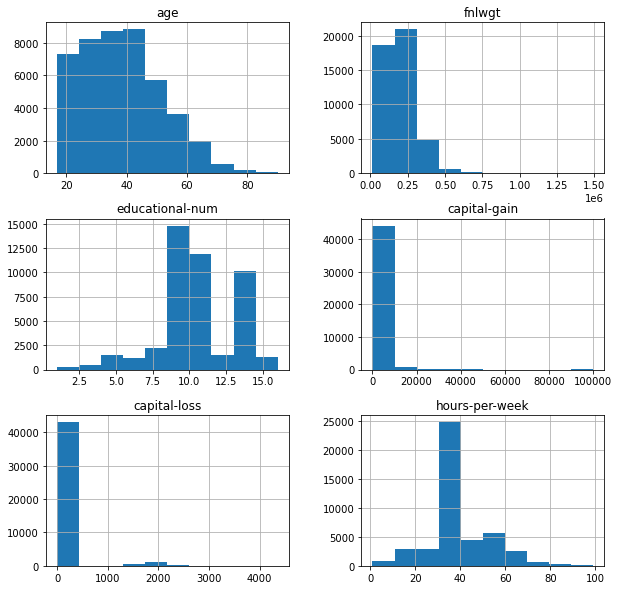

In [29]:
attributes.hist(figsize=(10,10))

In [30]:
car_attributes = data.select_dtypes(include=['object'])
print(car_attributes.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


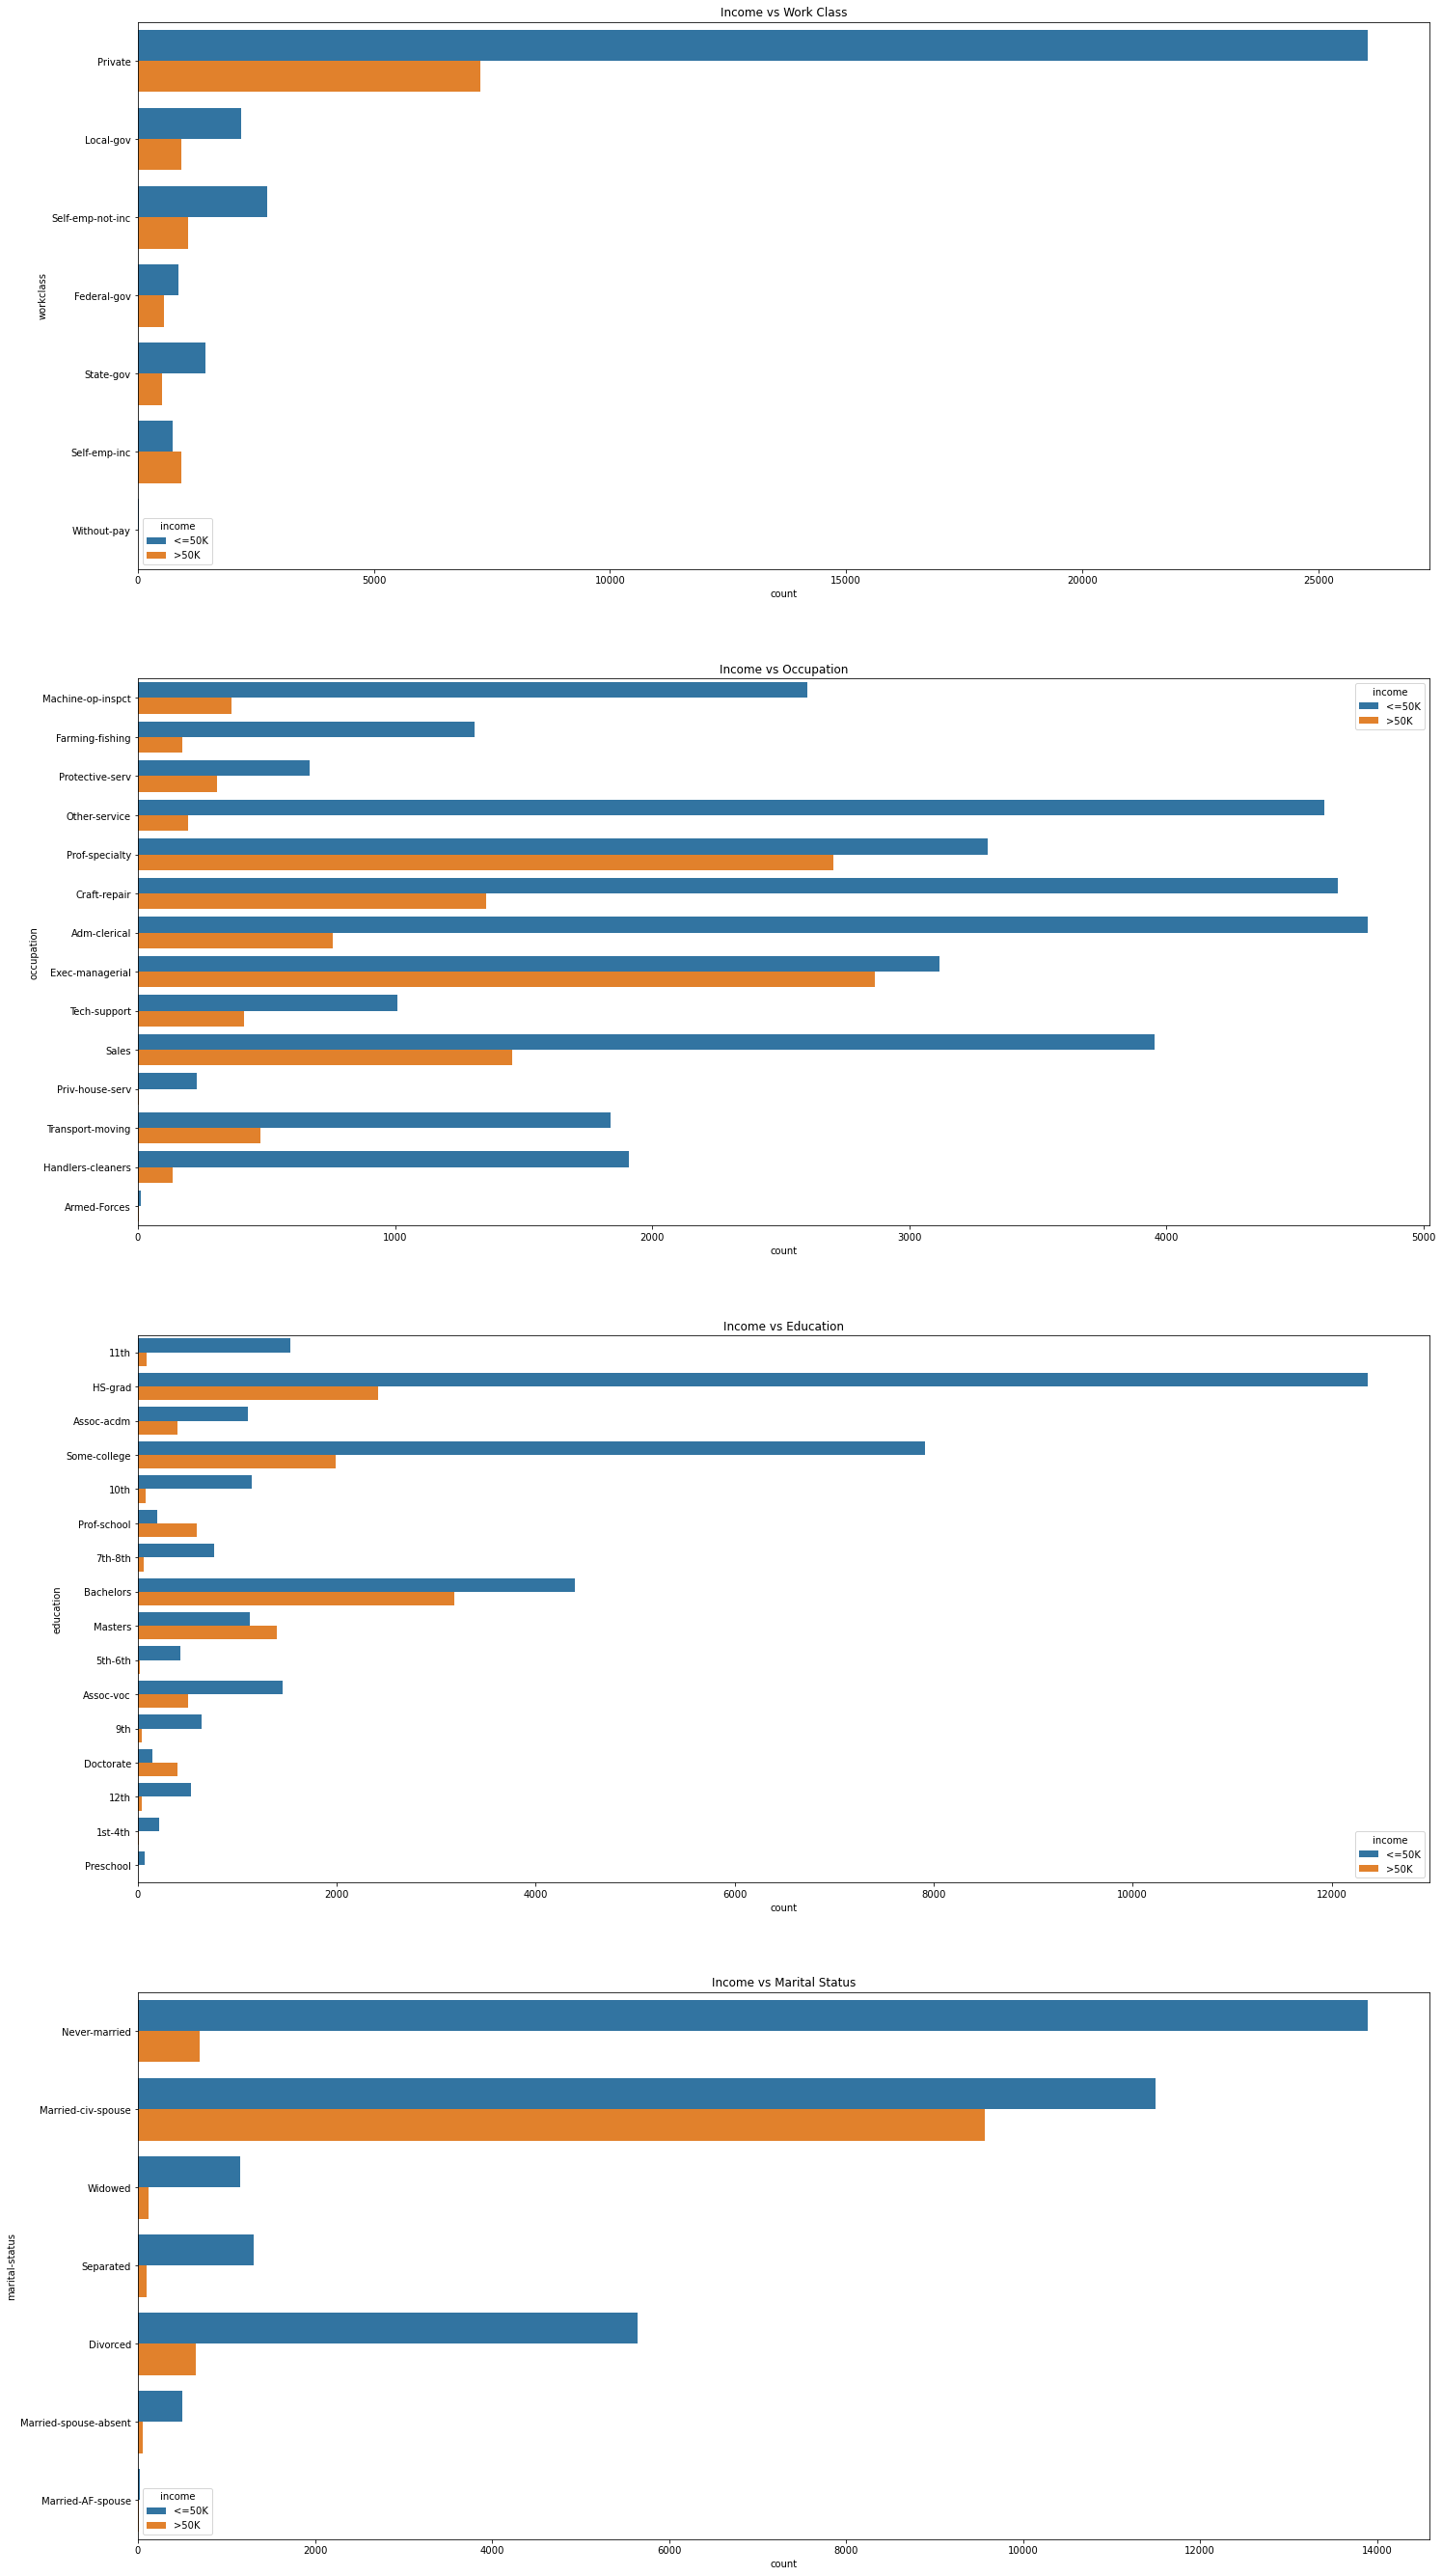

In [31]:
plt.figure(figsize=(24, 48))

plt.subplot(411)
sns.countplot(y='workclass', hue='income', data = car_attributes)
plt.title('Income vs Work Class')

plt.subplot(412)
sns.countplot(y='occupation', hue='income', data = car_attributes)
plt.title('Income vs Occupation')

plt.subplot(413)
sns.countplot(y='education', hue='income', data=car_attributes)
plt.title('Income vs Education')

plt.subplot(414)
sns.countplot(y='marital-status', hue='income', data=car_attributes)
plt.title('Income vs Marital Status')

plt.show()

In [32]:
data['income_category'] = "null"
data.loc[data['income'] == '>50K', ['income_category']] = 'high income'
data.loc[data['income'] == '<=50K', ['income_category']] = 'low income'
data.loc[:, 'income_category'].head()

0     low income
1     low income
2    high income
3    high income
5     low income
Name: income_category, dtype: object

In [33]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_category
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,low income
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,low income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,high income
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,high income
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,low income


In [34]:
racewise_income_dist = data.pivot_table(values=['income_category'], 
                                      index=['income', 'race'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race                               
<=50K  Amer-Indian-Eskimo              382
       Asian-Pac-Islander              934
       Black                          3694
       Other                           308
       White                         28696
>50K   Amer-Indian-Eskimo               53
       Asian-Pac-Islander              369
       Black                           534
       Other                            45
       White                         10207

In [35]:
racewise_income_dist = data.pivot_table(values=['income_category'], 
                                      index=['income', 'race', 'gender'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race               gender                 
<=50K  Amer-Indian-Eskimo Female              152
                          Male                230
       Asian-Pac-Islander Female              371
                          Male                563
       Black              Female             1958
                          Male               1736
       Other              Female              117
                          Male                191
       White              Female            10428
                          Male              18268
>50K   Amer-Indian-Eskimo Female               14
                          Male                 39
       Asian-Pac-Islander Female               65
                          Male                304
       Black              Female              126
                          Male                408
       Other              Female                9
                          Male                 36
       White              Female             1455
                          Male               8752

In [36]:
data.pivot_table(values=['income'], index=['workclass', 'gender'], aggfunc='count')

income
workclass        gender        
Federal-gov      Female     445
                 Male       961
Local-gov        Female    1244
                 Male      1856
Private          Female   11428
                 Male     21879
Self-emp-inc     Female     199
                 Male      1447
Self-emp-not-inc Female     617
                 Male      3179
State-gov        Female     755
                 Male      1191
Without-pay      Female       7
                 Male        14

C:\Users\lenovo\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


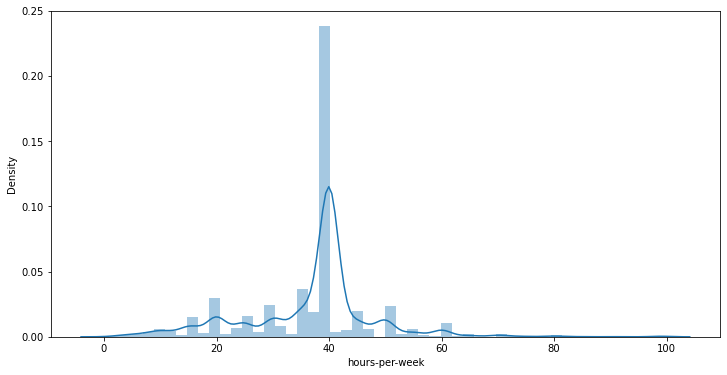

C:\Users\lenovo\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


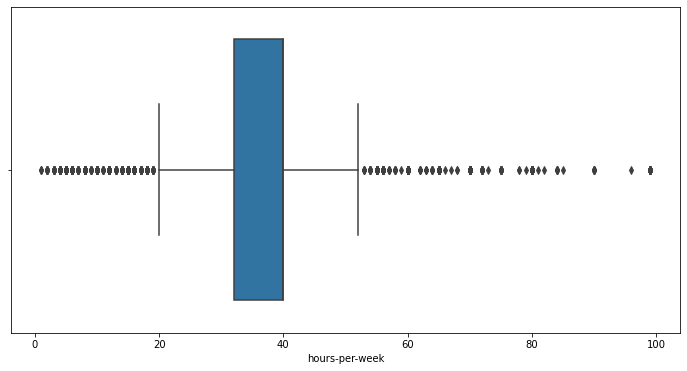

In [37]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_female = data.loc[data['gender'] == 'Female', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_female['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_female['hours-per-week'])
plt.show()

C:\Users\lenovo\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


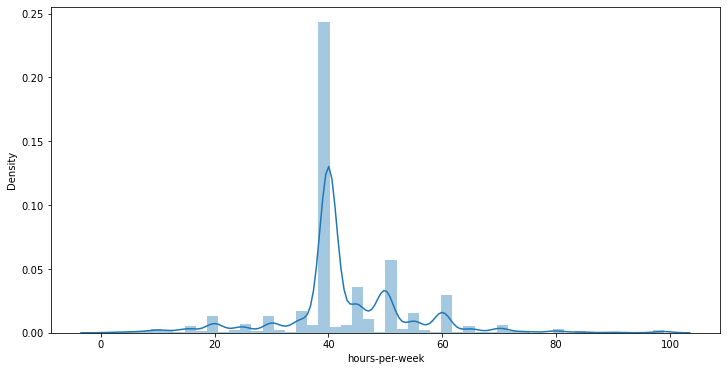

C:\Users\lenovo\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


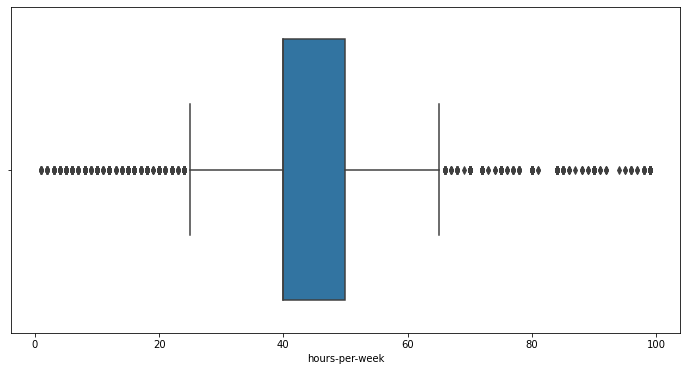

In [38]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_male = data.loc[data['gender'] == 'Male', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_male['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_male['hours-per-week'])
plt.show()

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

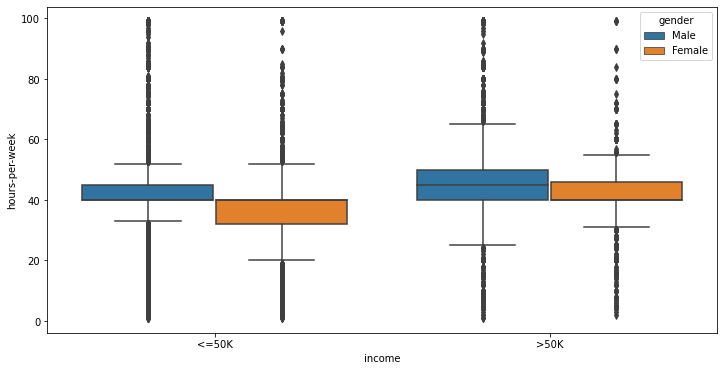

In [40]:
# Grouped boxplot for income, gender and number of hours per week.

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='income', y='hours-per-week', hue='gender')

<AxesSubplot:xlabel='income', ylabel='age'>

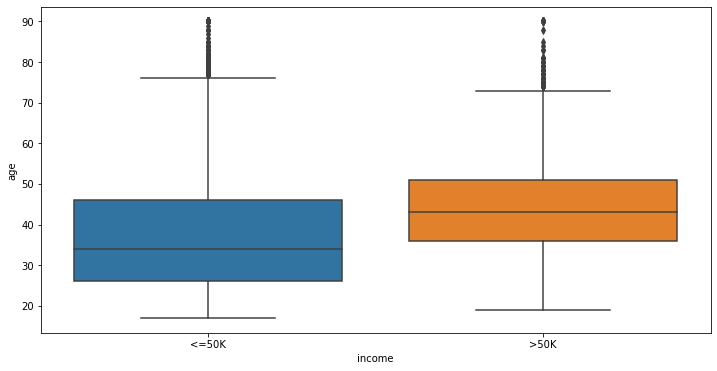

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='income', y='age')

# Analysis 
1. Which Workclass has higher income?
Answer-Those who are working in private sector 

2. Which sector is providing more employment ?
Answer-Private sector

3. Which occupation has higher income ?
Answer-Administrative and clerical

4. What is the relation between Marital status and income ?
Answer-Those persons who have never married

5. Which sector is giving high employment to females ?
Answer-Private sector 